In [1]:
import numpy as np
import control as ctl
import control.matlab as matlab
import matplotlib.pyplot as plt
from time import time

m=1.372 #(kg)
g=9.80665 #m/s^2
l=0.1638887897 #meter
ixx=0.04076112625
iyy=0.039692090288333336

A = np.array([[0,1,0,0],[m*g*l/ixx,0,0,0],[0,0,0,1],[0,0,m*g*l/iyy,0]])
B = np.array([[0,0],[1/ixx,0],[0,0],[0,1/iyy]])

print("A = \n", A)
print("B = \n", B)

Q = np.array([[1,0,0,0],    #posisi pitch
             [0,100,0,0],   #kecepatan pitch
             [0,0,1,0],     #posisi roll
             [0,0,0,10]])   #kecepatan roll
R = np.array([[1,0],[0,1]])
K, S, E = ctl.lqr(A, B, Q, R)
print("K = \n", K)


A = 
 [[ 0.          1.          0.          0.        ]
 [54.09758273  0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.          0.         55.55460504  0.        ]]
B = 
 [[ 0.          0.        ]
 [24.53317884  0.        ]
 [ 0.          0.        ]
 [ 0.         25.19393644]]
K = 
 [[ 4.62631171e+00  1.00188396e+01 -3.49575399e-16  1.09444277e-15]
 [-3.41942558e-15  1.12391964e-15  4.62631171e+00  3.21982235e+00]]


In [2]:
t0 = 0
t_end = 5
dt = 0.01
t = np.arange(t0,t_end+dt,dt)     # deret waktu 0 - 5 dengan kenaikan dt (0,01)


In [3]:
tolX1 = 0.10 #toleransi x1
rt = t_end
st = t_end
rtTarget = 0.2

sistem = ctl.ss((A-B*K),np.identity(4),np.identity(4),np.identity(4))

# Define error realtime??
gr= np.deg2rad(50) #gangguan roll
gp= np.deg2rad(15) #gangguan pitch

x = matlab.initial(sistem,t,np.array([gr,0,gp,0])) 
# print(x)
x1 = [1,0,0,0]@np.transpose(x[0])
x2 = [0,1,0,0]@np.transpose(x[0])
x3 = [0,0,1,0]@np.transpose(x[0])
x4 = [0,0,0,1]@np.transpose(x[0])



OvS = 0
peakOv = np.zeros(30)
OvKe = 0
OvBef = 0 
J = 0
t0 = int(round(time() * 1000))

for i in range(0, len(t)):
#    print("data ke-",i," = ",x1[i])
#    print("waktu ke-",i," = ",t[i])
    if (abs(x1[i]) < tolX1 and rt == t_end):
        rt = t[i]
        st = t[i]
    if (t[i] > rt and abs(x1[i]) > tolX1):
        OvS = x1[i]
        if (abs(OvS) < abs(OvBef) ):
            peakOv[OvKe] = OvBef
        else:
            OvBef = OvS
    if (t[i] > rt and peakOv[OvKe] > 0):
        OvKe = OvKe +1
        OvS = 0
        OvBef = 0
    
    #menghitung cost function
    t1 = time()*1000
    dt = t1 - t0
#    print("t0 = ",t0/1000)
#    print("t1 = ",t1/1000)
#    print("dt = ",dt/1000)
    t0 = t1
    xCF = np.array([[x1[i]],[x2[i]],[x3[i]],[x4[i]]])
    u = -K@xCF
#    print("u = ", u)
    J = J + ((np.transpose(xCF)@Q@xCF) + (np.transpose(u)@R@u))*dt/1000
#    print("J ke-",i," = ",J)


#cost funtion

print("Rise Time = ",rt)
print("Overshoot =\n",peakOv)
print("Cost Function = ",J)

Rise Time =  0.2
Overshoot =
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Cost Function =  [[0.4933753]]


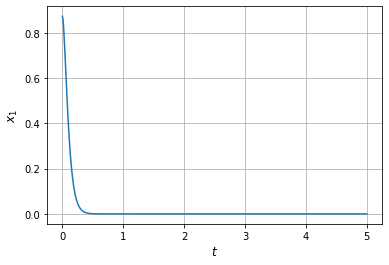

In [4]:
fig,ax=plt.subplots()
ax.plot(t,x1)
ax.set_ylabel('$x_1$',fontsize=12)
ax.set_xlabel('$t$',fontsize=12)
ax.grid()

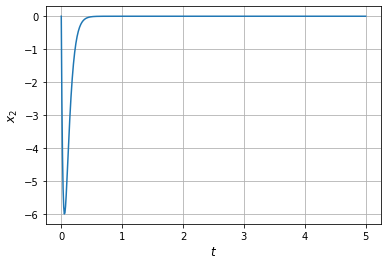

In [5]:
fig,ax=plt.subplots()
ax.plot(t,x2)
ax.set_ylabel('$x_2$',fontsize=12)
ax.set_xlabel('$t$',fontsize=12)
ax.grid()

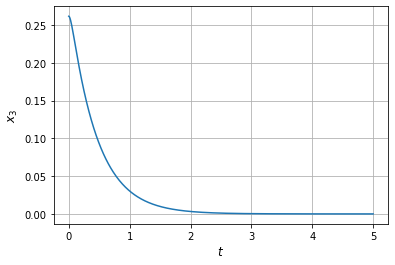

In [6]:
fig,ax=plt.subplots()
ax.plot(t,x3)
ax.set_ylabel('$x_3$',fontsize=12)
ax.set_xlabel('$t$',fontsize=12)
ax.grid()

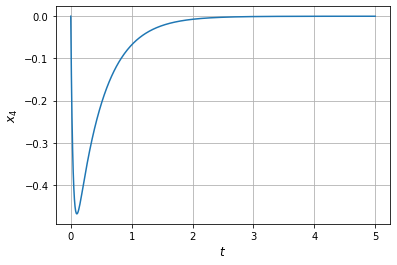

In [7]:
fig,ax=plt.subplots()
ax.plot(t,x4)
ax.set_ylabel('$x_4$',fontsize=12)
ax.set_xlabel('$t$',fontsize=12)
ax.grid()